# **Q.1} What is Simple Linear Regression?**
- Simple linear regression(SLR) means the model is only trained on one feature in this the data is across a line only so this is Simple linear Regression.

# **Q.2}What are the key assumptions of Simple Linear Regression?**
- The key assumptions are the value of Y depends on the rate of change of X.
Y_pred = b0 + b1 * X


# **Q.3} What is heteroscedasticity, and why is it important to address in regression models?**
- Heteroscedasticity basically means that the spread of the errors in the  regression model it isn’t consistent — it changes as the values of the variables change. This matters because it can mess up with the results, making  the predictions less reliable and making statistical results less useful.

## **Q.4} What is Multiple Linear regression?**
- The Linear Regression model where there are multiple number of features and coefficients and the for statistical outputs there are many regression plots but we've to find the best fit line among it this is known as multiple linear regression .

## **What is polynomial regression, and how does it differ from linear regression?**
- Polynomial regression is basically an extension of linear regression. Instead of fitting just a straight line, it adds powers of the input x^2, x^3 so the model can curve and better fit data that isn’t perfectly linear

# **Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:**
**X = [1, 2, 3, 4, 5]**

**Y = [2.1, 4.3, 6.1, 7.9, 10.2]**

**Plot the regression line over the data points.**

Intercept (b0): 0.18
Slope (b1): 1.98


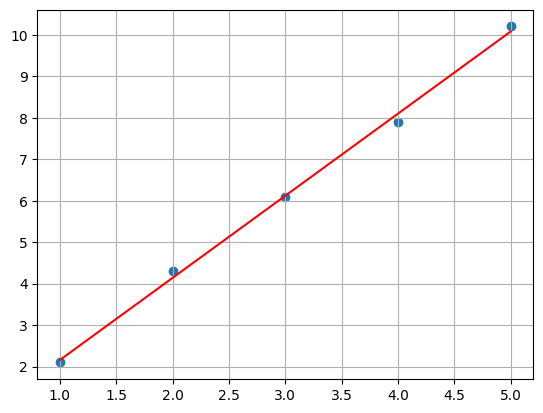

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model= LinearRegression()
model.fit(X,Y)

Y_pred= model.predict(X) # coeff(slope) * X

print(f"Intercept (b0): {model.intercept_:.2f}")# b0 + b1*X
print(f"Slope (b1): {model.coef_[0]:.2f}")
plt.plot(X, Y_pred, color='red')
plt.scatter(X, Y)
plt.grid(True)
plt.show()

In [4]:
#Question 7: Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Put data in a table
df = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})

# Separate input (X) and output (y)
X = df[['Area', 'Rooms']]
y = df['Price']

# Train model
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Calculate VIF
X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVIF values:")
print(vif)


Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

VIF values:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


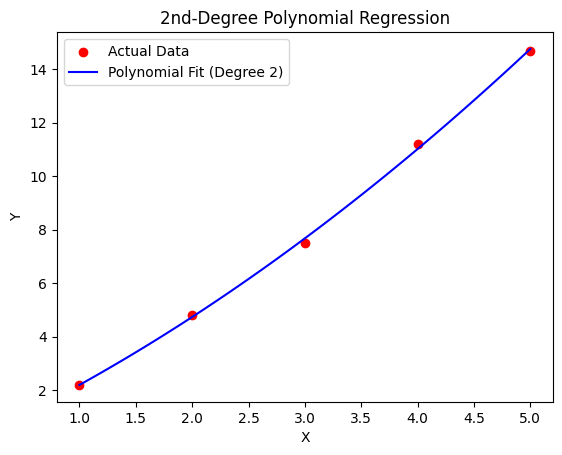

In [5]:
#Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)
X_fit = np.linspace(1, 5, 100).reshape(-1, 1)
Y_fit = model.predict(poly.transform(X_fit))
plt.scatter(X, Y, color='red', label='Actual Data')
plt.plot(X_fit, Y_fit, color='blue', label='Polynomial Fit (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd-Degree Polynomial Regression')
plt.legend()
plt.show()


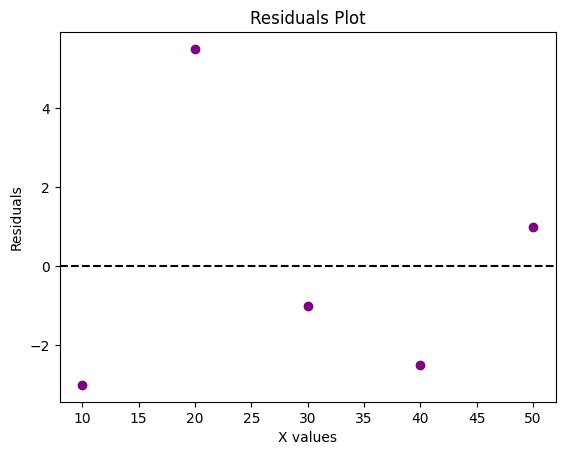

In [6]:
#Q.9}Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

# Calculate residuals (actual - predicted)
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('X values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


### **Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure robustmodel.**



- If I found heteroscedasticity, I’d first look at the residual plots and then try fixing it by taking a log of the target variable or using a robust regression method.
For multicollinearity, I’d check the VIF values, remove or merge correlated features, or switch to Ridge or Lasso regression so the model stays stable and reliable.